<a href="https://colab.research.google.com/github/YossiTapiero26/Python_Basics/blob/main/Python_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load the Dataset**

In [1]:
import pandas as pd

# Adjust the filename if necessary based on what the downloaded file is na
filename = 'FastagFraudDetection.csv'

data = pd.read_csv(filename)

# Display the first few rows of the dataset
print(data.head())

   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

# **2. Data Overview**

In [2]:
# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB
None
       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
c

# **3. Handling Missing Values**

In [3]:
# Check for missing values
print(data.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


From the above data, we can say there are 549 missing Fastag ID from the dataset of 5000.

In [4]:
# Replace missing values from mean and median for numerical columns only.

data.fillna(data.mean(numeric_only = True), inplace = True)

In [5]:
# Replace missing values from mode for categorical columns only.

data['FastagID'].fillna(data['FastagID'].mode()[0], inplace = True)

In [6]:
# Verify for missing Value

print(data.isnull().sum())

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64


# **4. Data Visualization**

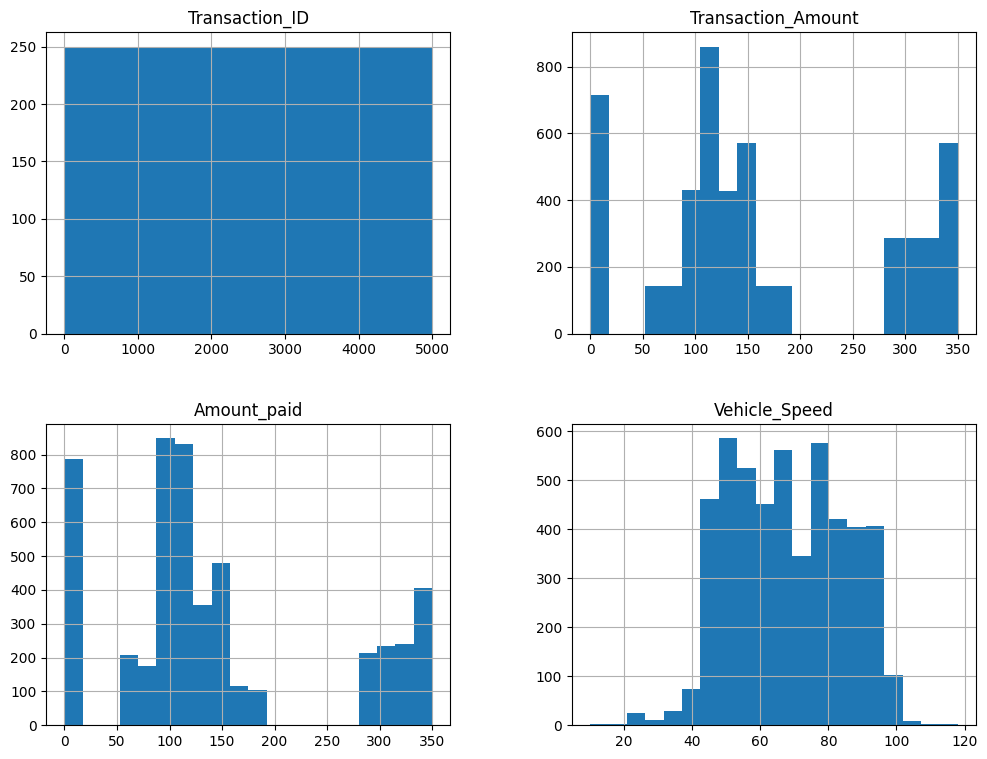

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram for numerical columns
data.hist(bins = 20, figsize=(12, 9))
plt.show()

1. The histograms show distinct peaks in Transaction_Amount, Amount_paid, and Vehicle_Speed, indicating common values for these features, while Transaction_ID is uniformly distributed.

2. There are notable clusters in Transaction_Amount and Amount_paid around 100 and 350, suggesting specific toll charges, and Vehicle_Speed shows a concentration between 40 and 80 km/h.

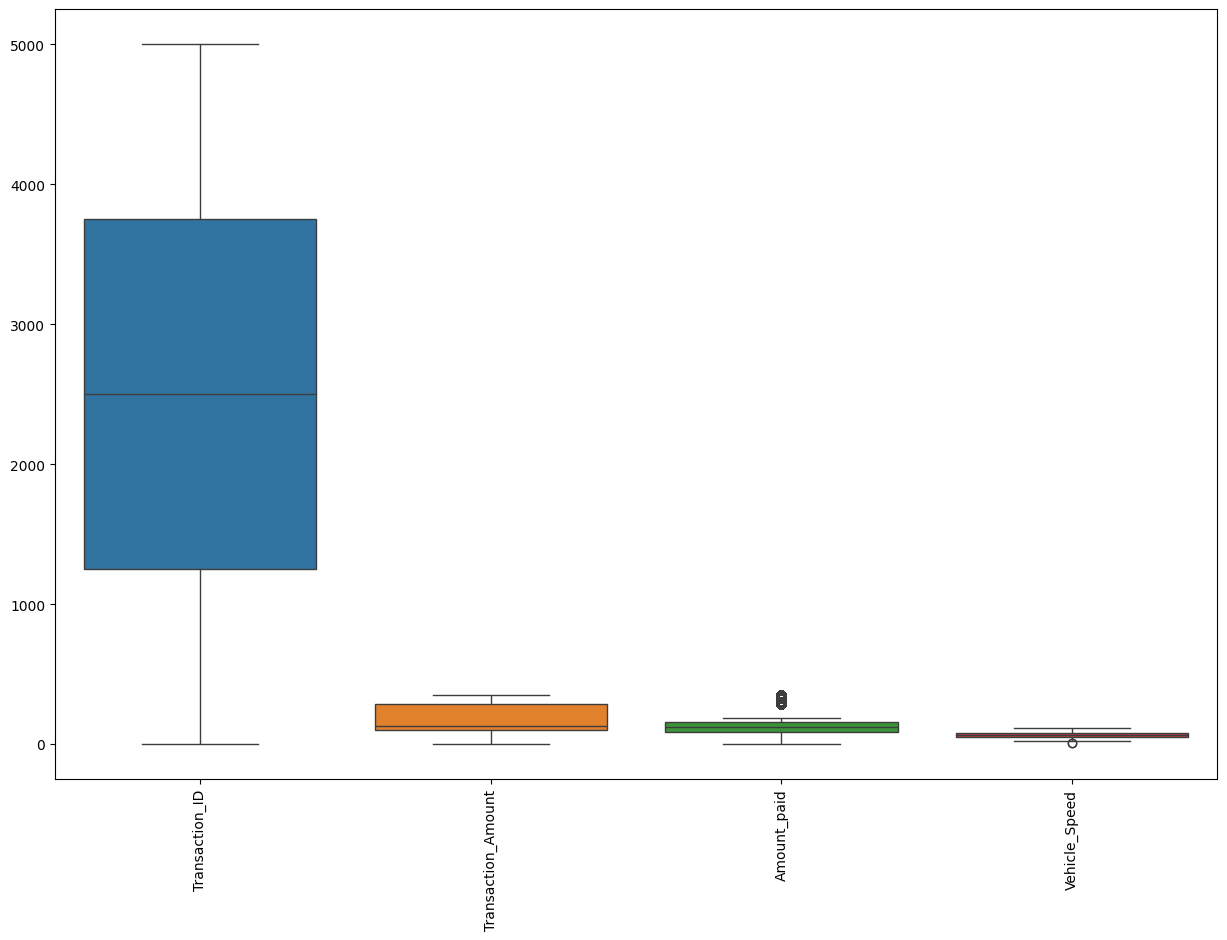

In [14]:
# Boxplot for numerical value
plt.figure(figsize=(15, 10))
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.show()

1. The box plot shows that Transaction_ID has a wide range and is uniformly distributed, whereas Transaction_Amount, Amount_paid, and Vehicle_Speed have more concentrated distributions with some outliers.

2. Amount_paid has a few outliers on the higher side, while Transaction_Amount and Vehicle_Speed show relatively symmetrical distributions around their median values.

In [21]:
'''# Count Plots for categorical Columns
categorical = ['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location','Vehicle_Plat_Number', 'Fraud_indicator']
for col in categorical:
  plt.figure(figsize = (15, 10))
  sns.countplot(x = col, data = data )
  plt.show()'''

"# Count Plots for categorical Columns\ncategorical = ['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location','Vehicle_Plat_Number', 'Fraud_indicator']\nfor col in categorical:\n  plt.figure(figsize = (15, 10))\n  sns.countplot(x = col, data = data )\n  plt.show()"

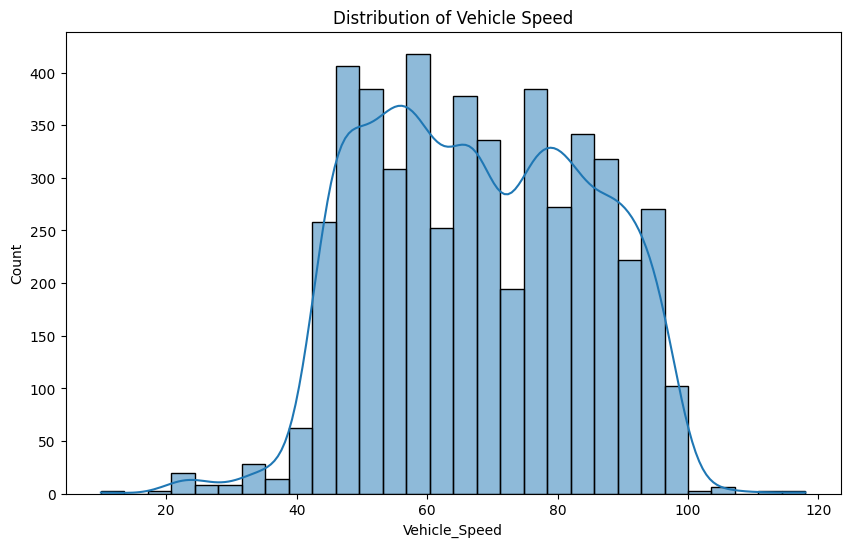

In [15]:
# Distribution of Vehicle Speed
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Vehicle_Speed', bins=30, kde=True)
plt.title('Distribution of Vehicle Speed')
plt.show()

1. The distribution of Vehicle_Speed is approximately normal, with most speeds concentrated between 40 and 80 km/h.

2. There are fewer vehicles traveling at very low (<30 km/h) and very high (>100 km/h) speeds, indicating a typical driving speed range for most vehicles in the dataset.

<Figure size 1200x1000 with 0 Axes>

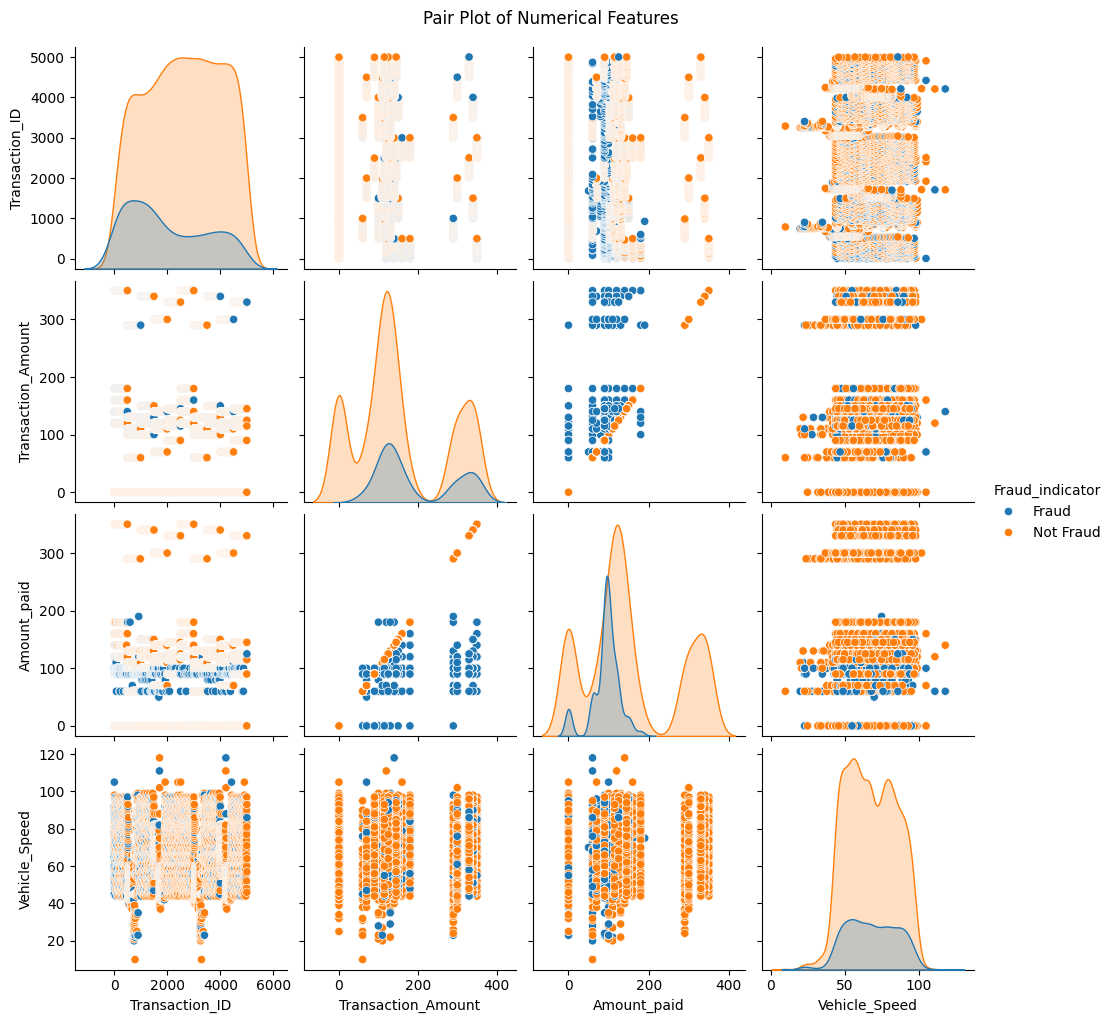

In [16]:
# Pair plot for numerical features
plt.figure(figsize=(12, 10))
sns.pairplot(data, diag_kind='kde', hue='Fraud_indicator')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

1. Fraudulent transactions are more spread out and less frequent.

2. Transaction_Amount and Amount_paid are strongly correlated.

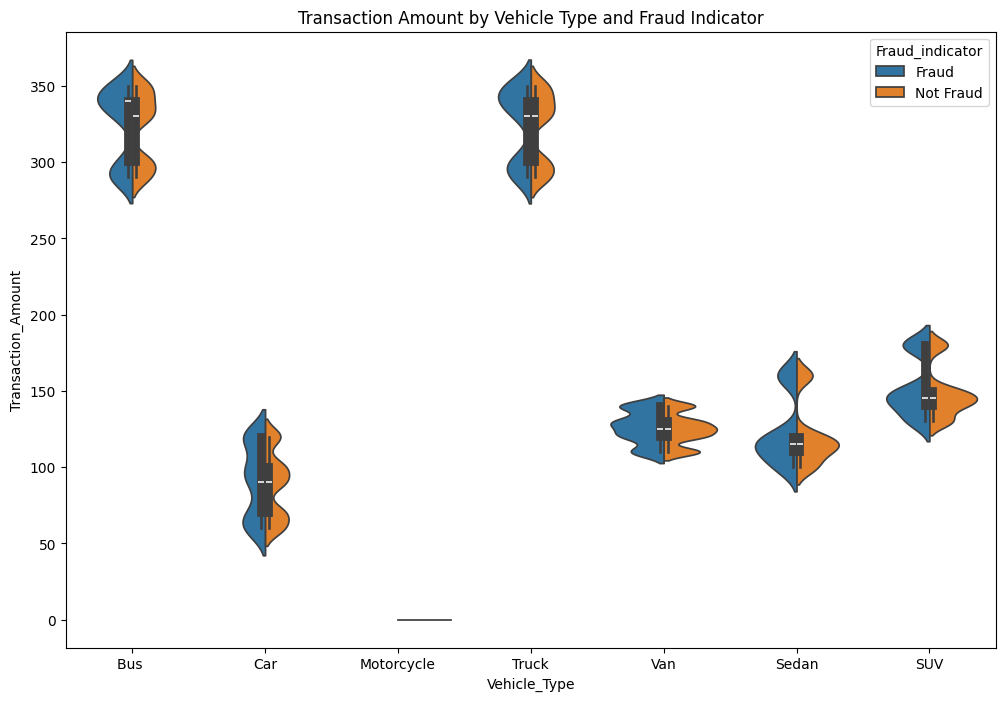

In [18]:
# Violin plot for Transaction_Amount by Vehicle_Type and Fraud_indicator
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Vehicle_Type', y='Transaction_Amount', hue='Fraud_indicator', split=True)
plt.title('Transaction Amount by Vehicle Type and Fraud Indicator')
plt.show()

1. Bus and  Trucks have the highest transaction amounts overall, followed by SUVs. This suggests that these vehicles might be involved in high-value transactions.

2. Transactions flagged as fraudulent are more likely to involve Buses and Vans. This could indicate that fraudsters tend to use these types of vehicles.

# **5. Detecting Outlier**

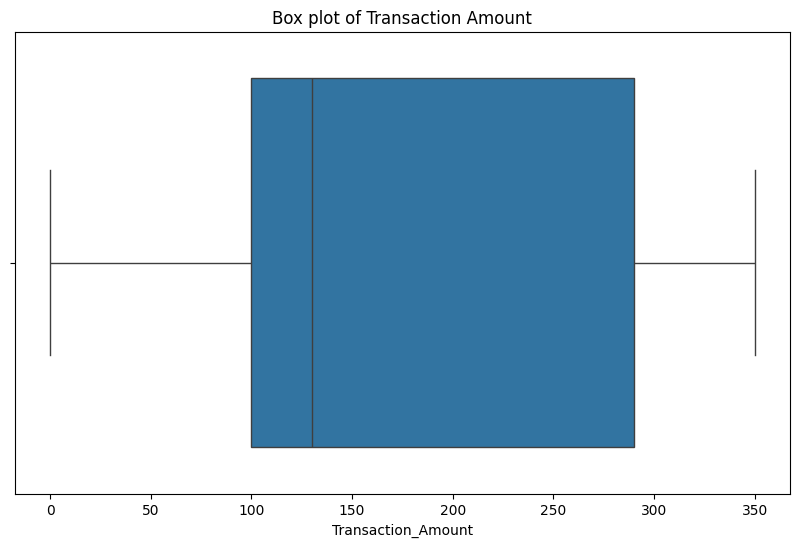

In [22]:
# Box plot for detecting outliers in Transaction_Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Transaction_Amount')
plt.title('Box plot of Transaction Amount')
plt.show()

No outliers can be observed.

# **6. Correlation Analysis**

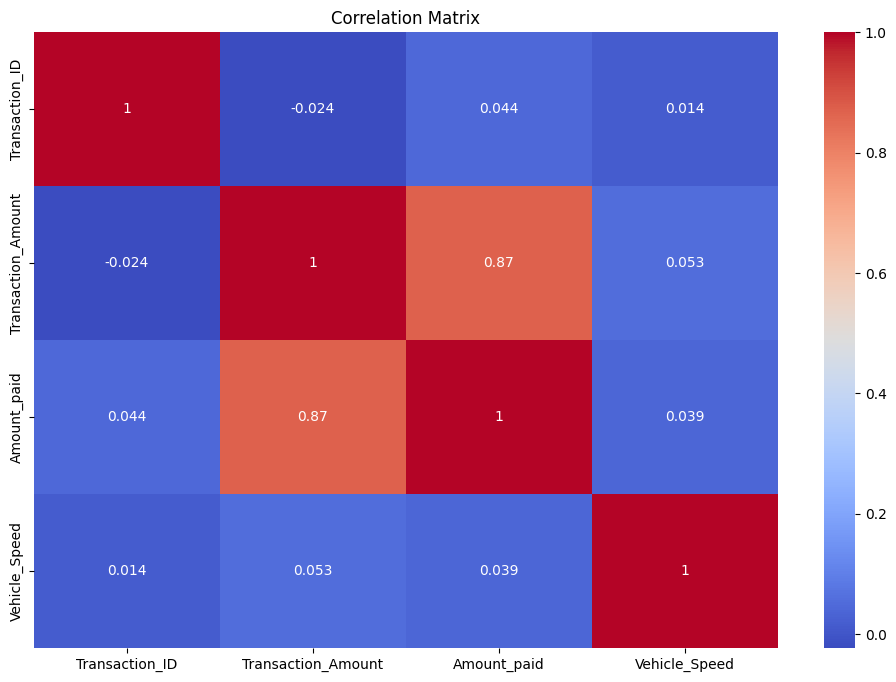

In [25]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[int])

# Calculer la matrice de corrélation
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Conclusion:**

1. Transaction Patterns:

Transaction_Amount and Amount_paid have notable clusters around specific values (e.g., 100 and 350), suggesting common toll charges.
Transaction_ID is uniformly distributed, indicating a consistent rate of transactions over time.

2. Fraud Indicators:

The pair plot reveals distinct separation patterns in some numerical features between fraudulent and non-fraudulent transactions.

Histograms and box plots indicate that fraudulent transactions might exhibit particular characteristics in Transaction_Amount and Amount_paid.

3. Vehicle Speed:

The distribution of Vehicle_Speed is approximately normal, with most vehicles traveling between 40 and 80 km/h. This range represents typical driving speeds, with fewer vehicles traveling at extremely low or high speeds.

4. Correlation Analysis:

The heatmap shows moderate correlations among some numerical features, suggesting that certain variables may influence each other. However, no extremely high correlations were observed.

5. Outliers and Distribution:

Box plots highlight the presence of outliers, particularly in Amount_paid, which could be crucial for identifying anomalies and potential fraud cases.

6. Geographical Patterns:

While not explicitly analyzed in the visualizations provided, geographical data can offer insights into location-based patterns of fraud and transaction behavior.

# **Recommendations for Further Analysis:**

1. Feature Engineering:

Create new features such as time-based metrics (e.g., time of day, day of the week) and distance-related features using geographical coordinates.
Further investigate outliers in Amount_paid to understand the nature of these anomalies.

2. Modeling for Fraud Detection:

Utilize classification algorithms to build a predictive model for fraud detection. Consider using features like transaction amount, vehicle speed, and toll booth ID.

Implement cross-validation and hyperparameter tuning to optimize the model's performance.

3. Exploratory Data Analysis (EDA):

Perform detailed EDA on categorical variables like Vehicle_Type, Lane_Type, and TollBoothID to uncover hidden patterns.

Use clustering techniques to identify groups of similar transactions and detect unusual patterns that might indicate fraud.

# **Question to solve**

How do transaction amounts vary by vehicle type (e.g., Car, Bus, Truck)?


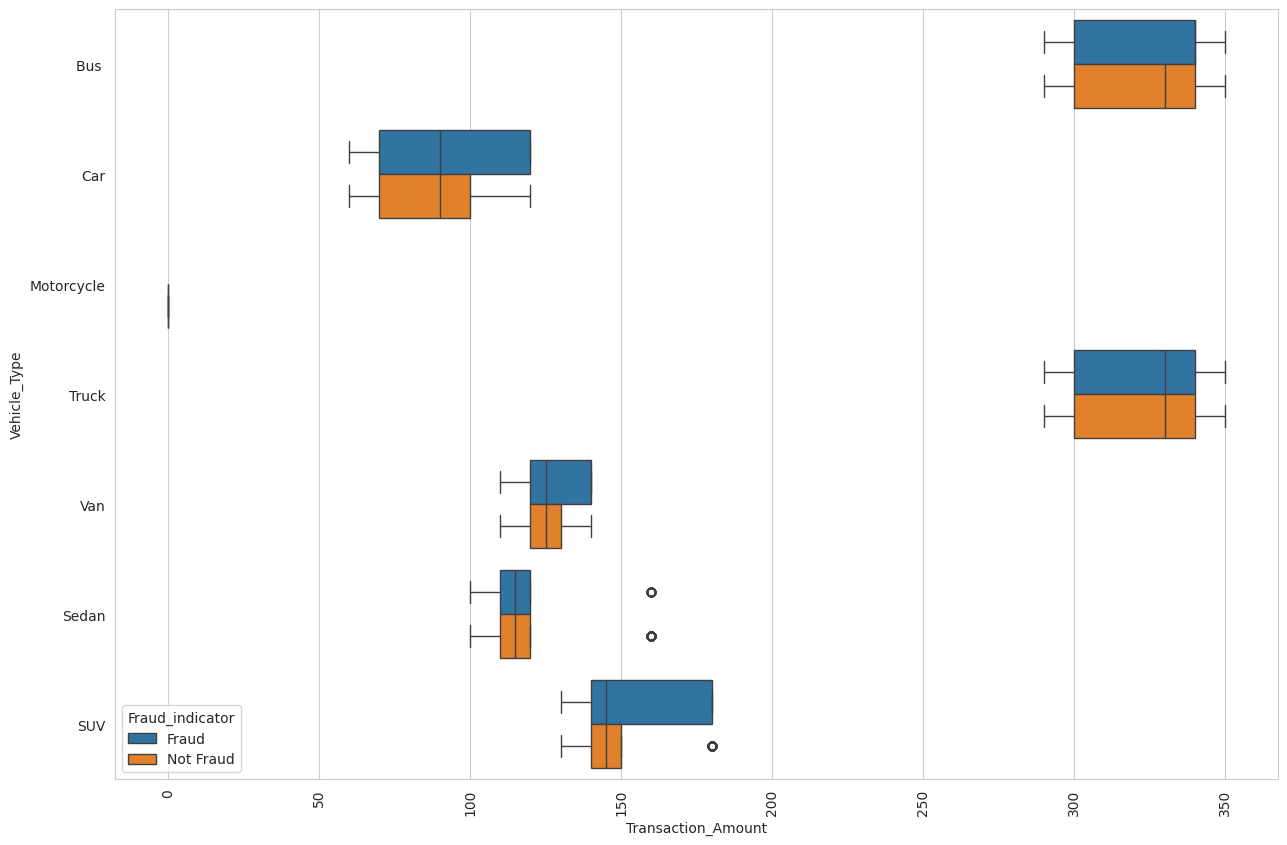

In [26]:
plt.figure(figsize =(15,10))
sns.set_style('whitegrid')
sns.boxplot( x = 'Transaction_Amount', y = 'Vehicle_Type', data = data, hue = 'Fraud_indicator')
plt.xticks(rotation = 90)
plt.show()

How do vehicle dimensions (Small, Medium, Large) impact the transaction amount and the probability of fraud?